## Projeto 3

### Considere a base dados abaixo:

In [1]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# generate 2d classification dataset
n_samples = 300
#X, y = skdata.make_moons(n_samples=n_samples, noise=0.6)
X, y = skdata.make_circles(n_samples=n_samples, factor=.5,noise=0.2)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
Y = np.array(data[list(data.columns)[-1]],dtype=str)

# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop(list(data.columns)[-1], axis = 1)

# Saving feature names for later use
data_list = list(data.columns)

# Convert to numpy array
X = np.array(data)

### 1) Compare os seguintes algoritmos: (a) Redes Neurais, (b) Naive Bayes, (c) Knn, (d) Random forest. Use as métricas Accuracy, F1, Precision, Recall.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

def metricasKNN (X, Y, p=0.7) :
    metricas_knn = []
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    model = KNeighborsClassifier(n_neighbors=1)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y = model.predict(test_x)
    metricas_knn.append(accuracy_score(pred_y, test_y))
    metricas_knn.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_knn.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_knn.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_knn
    


In [4]:
metricas_knn = metricasKNN (X, Y, p=0.7)
print(metricas_knn)

[0.8571428571428571, 0.8571428571428571, 0.8666666666666667, 0.8478260869565217]


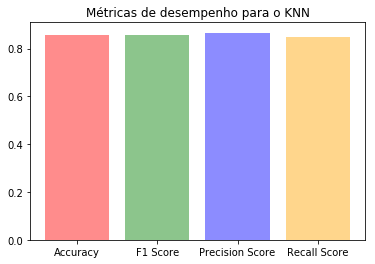

In [5]:
cl = ['Accuracy','F1 Score', 'Precision Score','Recall Score']
numbers = np.arange(0, len(cl))
plt.bar(numbers, metricas_knn, alpha=.45, color=['red', 'green', 'blue', 'orange'])
plt.xticks(numbers, cl)
plt.title('Métricas de desempenho para o KNN')
plt.show(True)


In [6]:
from sklearn.ensemble import RandomForestClassifier

def metricasRandomForest (X, Y, p=0.7) :
    metricas_rf = []
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    clf = RandomForestClassifier(n_estimators = 50)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    metricas_rf.append(accuracy_score(pred_y, test_y))
    metricas_rf.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_rf.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_rf.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_rf

In [7]:
metricas_rf = metricasRandomForest (X, Y, p=0.7)
print(metricas_rf)

[0.8571428571428571, 0.8505747126436782, 0.9024390243902439, 0.8043478260869565]


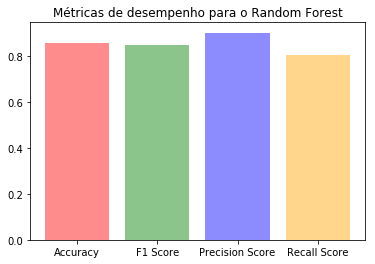

In [8]:
cl = ['Accuracy','F1 Score', 'Precision Score','Recall Score']
numbers = np.arange(0, len(cl))
plt.bar(numbers, metricas_rf, alpha=.45, color=['red', 'green', 'blue', 'orange'])
plt.xticks(numbers, cl)
plt.title('Métricas de desempenho para o Random Forest')
plt.show(True)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

def metricasNeuralNetworks (X, Y, p=0.7) :
    metricas_nn = []
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    scaler = MinMaxScaler()  
    scaler.fit(train_x.astype(float))  
    train_x = scaler.transform(train_x)  
        
    # apply same transformation to test data
    test_x = scaler.transform(test_x)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    metricas_nn.append(accuracy_score(pred_y, test_y))
    metricas_nn.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nn.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nn.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_nn

In [10]:
metricas_nn = metricasNeuralNetworks (X, Y, p=0.7)
print(metricas_nn)

[0.8241758241758241, 0.8333333333333333, 0.8, 0.8695652173913043]


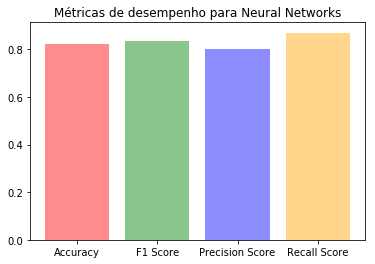

In [11]:
cl = ['Accuracy','F1 Score', 'Precision Score','Recall Score']
numbers = np.arange(0, len(cl))
plt.bar(numbers, metricas_nn, alpha=.45, color=['red', 'green', 'blue', 'orange'])
plt.xticks(numbers, cl)
plt.title('Métricas de desempenho para Neural Networks')
plt.show(True)

In [12]:
from sklearn.naive_bayes import GaussianNB

def metricasNaiveBayes (X, Y, p=0.7) :
    metricas_nb = []
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    pred_y = gnb.predict(test_x)
    metricas_nb.append(accuracy_score(pred_y, test_y))
    metricas_nb.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nb.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nb.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_nb

In [13]:
metricas_nb = metricasNaiveBayes (X, Y, p=0.7)
print(metricas_nb)

[0.8461538461538461, 0.8409090909090908, 0.8809523809523809, 0.8043478260869565]


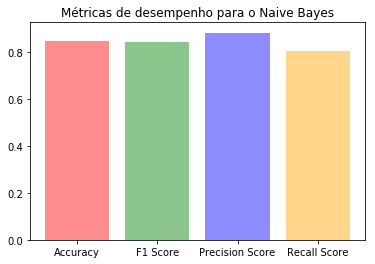

In [14]:
cl = ['Accuracy','F1 Score', 'Precision Score','Recall Score']
numbers = np.arange(0, len(cl))
plt.bar(numbers, metricas_nb, alpha=.45, color=['red', 'green', 'blue', 'orange'])
plt.xticks(numbers, cl)
plt.title('Métricas de desempenho para o Naive Bayes')
plt.show(True)

Considere a partir de agora a base de dados sobre diabetes:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

### 2 - Verifique como a classifição muda quando consideramos o método k-fold, cross validation. Ou seja, faça um gráfico da medida Precison em função de k, para os algoritmos Redes Neurais e Random Forest.

#### Pré-processamento

In [15]:
import pandas as pd
#Lendo arquivo diabetes.csv
features = pd.read_csv("diabetes.csv", header=(0))
print(features.shape)
features.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
#Tirando os valores NaN e duplicados
features = features.dropna()
features = features.drop_duplicates()
features = features.replace('?', np.nan)
features = features.dropna()

#Obtendo as classes únicas do dataset
classes = pd.unique(features[features.columns[-1]])
classes = np.array(classes, dtype=str)
print("Classes únicas no conjunto de dados:\n", classes)

list_labels = list(features.columns)
print("\nAtributos do dataset:\n", list_labels[:-1])

Classes únicas no conjunto de dados:
 ['1' '0']

Atributos do dataset:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [17]:
#Y é o array que contém a classe
Y = np.array(features[list_labels[-1]], dtype=str)

#X é o array que contém somente os atributos
features = features.drop(list_labels[-1], axis = 1)
X = np.array(features)

In [18]:
#Número de cada classe do dataset
ncl = np.zeros(len(classes))
for i in np.arange(0, len(classes)):
    a = Y == classes[i]
    ncl[i] = len(Y[a])
print(ncl)

[268. 500.]


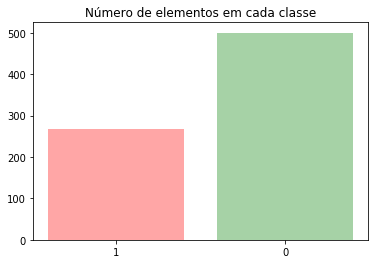

In [19]:
numbers = np.arange(0, len(classes))
plt.bar(numbers, ncl, alpha=.35, color=['red', 'green', 'blue', 'orange', 'cyan'])
plt.xticks(numbers, classes)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

kprecision = []
kprecision_nn = []
list_k = []
for k in range(2, 11):
    list_k.append(k)
    kf = KFold(n_splits=k)
    vprecision = []
    
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = RandomForestClassifier(random_state=0, n_estimators=100)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        vprecision.append(precision_score(y_test, y_pred, average=None))
    kprecision.append(np.mean(vprecision))
    
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        scaler = MinMaxScaler()  
        scaler.fit(x_train.astype(float))  
        x_train = scaler.transform(x_train)  
        
        # apply same transformation to test data
        x_test = scaler.transform(x_test)
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
        clf.fit(x_train, y_train);
        y_pred = clf.predict(x_test)
        vprecision.append(precision_score(y_test, y_pred, average=None))
    kprecision_nn.append(np.mean(vprecision))


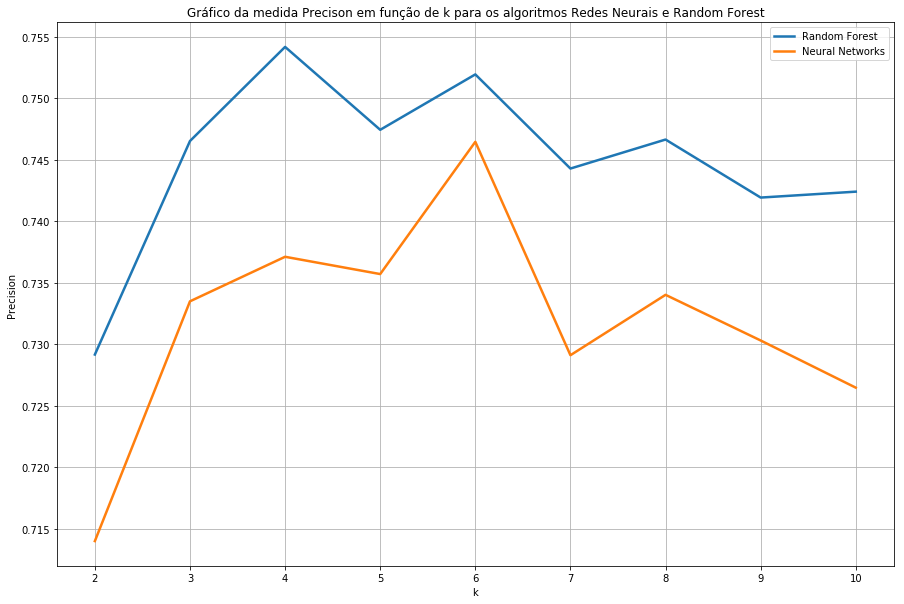

In [22]:
plt.figure(figsize=(15,10))
plt.title("Gráfico da medida Precison em função de k para os algoritmos Redes Neurais e Random Forest")
plt.xlabel("k")
plt.ylabel("Precision")
plt.plot(list_k, kprecision, label='Random Forest', linewidth=2.5)
plt.plot(list_k, kprecision_nn, label='Neural Networks', linewidth=2.5)
plt.legend(loc='best')
plt.grid(True)

### 3 - Compare os classificadores Redes Neurais, Naïve Bayes e Random Forest para k=10 (k-fold cross validation estratificado) em termos da curva ROC. Qual classificador é o melhor? Justifique.

In [23]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
for train_index, test_index in cv.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #Random forest
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy:', accuracy_score(y_pred, y_test))
    vprecision.append(accuracy_score(y_pred, y_test))
    
print('\nAverage Accuracy:', np.mean(vprecision))

Accuracy: 0.7662337662337663
Accuracy: 0.8051948051948052
Accuracy: 0.7402597402597403
Accuracy: 0.7142857142857143
Accuracy: 0.7662337662337663
Accuracy: 0.8311688311688312
Accuracy: 0.7142857142857143
Accuracy: 0.8051948051948052
Accuracy: 0.6842105263157895
Accuracy: 0.75

Average Accuracy: 0.7577067669172932


In [24]:
from sklearn.metrics import roc_curve, auc

clf = RandomForestClassifier(n_estimators = 50)
clf.fit(x_train, y_train)
y_predict_probabilities = clf.predict_proba(x_test)[:,1]

y_test = np.array(y_test, dtype = 'int')
fpr, tpr, thresholds = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

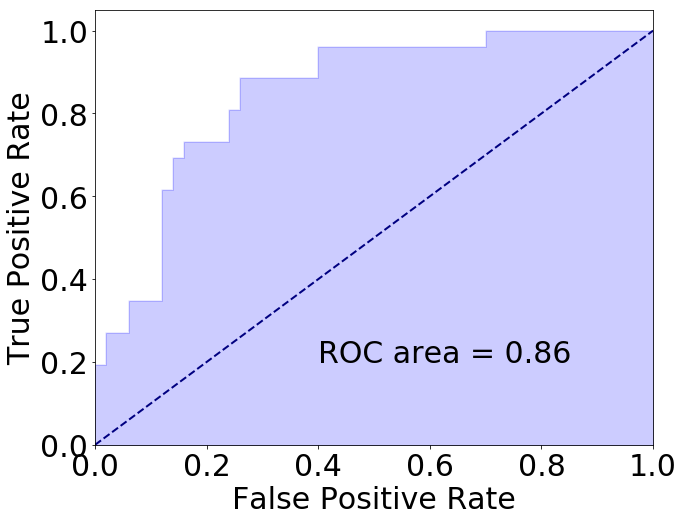

In [25]:
plt.figure(figsize=(10,8))
plt.step(fpr, tpr, color='b', alpha=0.1, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
#plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
for train_index, test_index in cv.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #Random forest
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    print('Accuracy:', accuracy_score(y_pred, y_test))
    vprecision.append(accuracy_score(y_pred, y_test))
    
print('\nAverage Accuracy:', np.mean(vprecision))

Accuracy: 0.7792207792207793
Accuracy: 0.7922077922077922
Accuracy: 0.7272727272727273
Accuracy: 0.7792207792207793
Accuracy: 0.7922077922077922
Accuracy: 0.7272727272727273
Accuracy: 0.7142857142857143
Accuracy: 0.8181818181818182
Accuracy: 0.6710526315789473
Accuracy: 0.7105263157894737

Average Accuracy: 0.7511449077238551


In [27]:
from sklearn.metrics import roc_curve, auc

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict_probabilities = gnb.predict_proba(x_test)[:,1]

y_test = np.array(y_test, dtype = 'int')
fpr, tpr, thresholds = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

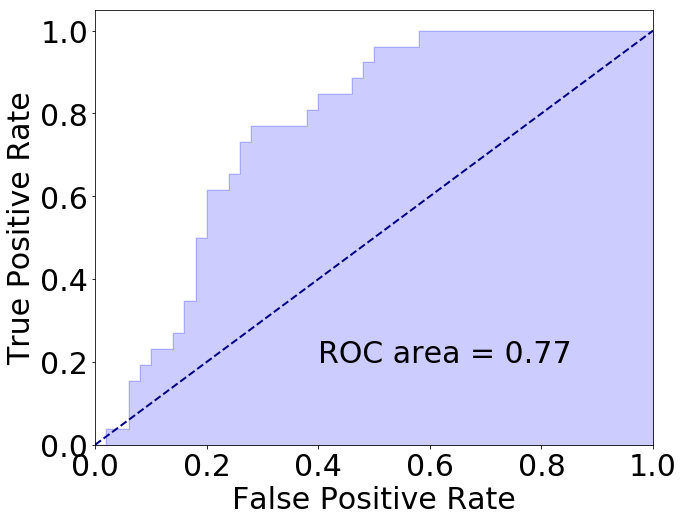

In [28]:
plt.figure(figsize=(10,8))
plt.step(fpr, tpr, color='b', alpha=0.1, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
#plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

In [29]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
for train_index, test_index in cv.split(X, Y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    scaler = MinMaxScaler()  
    scaler.fit(x_train.astype(float))  
    x_train = scaler.transform(x_train)  
        
    # apply same transformation to test data
    x_test = scaler.transform(x_test)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
    clf.fit(x_train, y_train);
    y_pred = clf.predict(x_test)
    print('Accuracy:', accuracy_score(y_pred, y_test))
    vprecision.append(accuracy_score(y_pred, y_test))
    
print('\nAverage Accuracy:', np.mean(vprecision))

Accuracy: 0.7142857142857143
Accuracy: 0.7792207792207793
Accuracy: 0.7272727272727273
Accuracy: 0.7272727272727273
Accuracy: 0.7142857142857143
Accuracy: 0.7662337662337663
Accuracy: 0.7012987012987013
Accuracy: 0.8441558441558441
Accuracy: 0.6578947368421053
Accuracy: 0.7763157894736842

Average Accuracy: 0.7408236500341763


In [30]:
from sklearn.metrics import roc_curve, auc

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
clf.fit(x_train, y_train)
y_predict_probabilities = clf.predict_proba(x_test)[:,1]

y_test = np.array(y_test, dtype = 'int')
fpr, tpr, thresholds = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

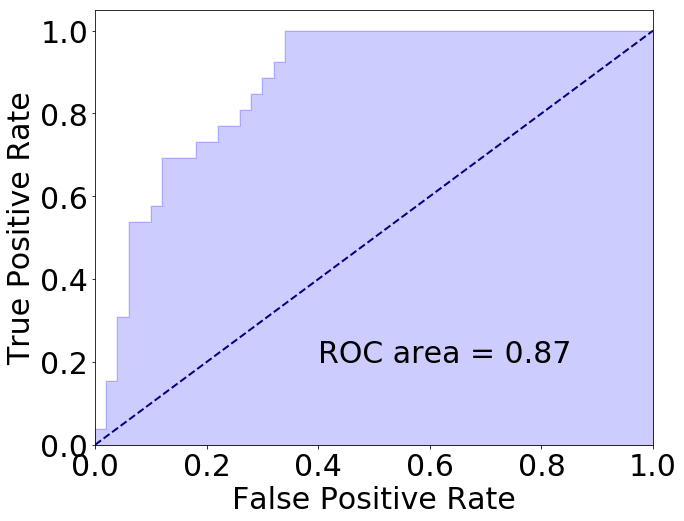

In [31]:
plt.figure(figsize=(10,8))
plt.step(fpr, tpr, color='b', alpha=0.1, where='post')
plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
#plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

### 4 – Usando o método que seleciona apenas um atributo por vez (univariado,teste qui-quadrado), faça uma curva da medida F1 em função do número de atributos considerados. Isto é, obtenha F1 para o atributo mais importante, depois para os dois mais importantes e assim por diante.

### 5 – Projete os dados usando PCA e faça um gráfico de F1 em termos do número de components. Quantos components oferecem a maior taxa de acerto? Comparecom a curva “cumulative explained variance” versus “number of components” e explique os resultados.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

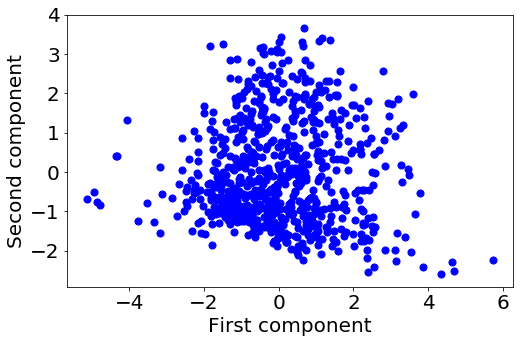

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

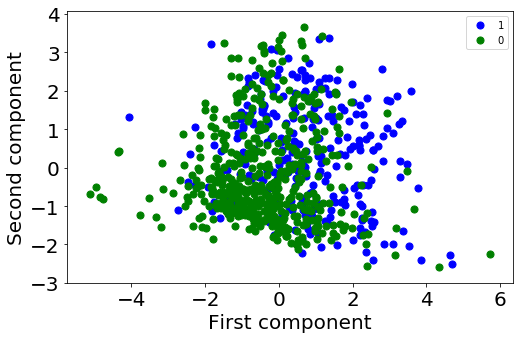

In [35]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(Y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

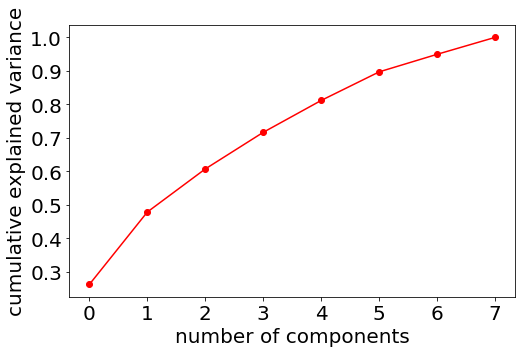

In [36]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

### 6 – Considere agora a base de dados do Titanic, conforme descrita em: https://paulovasconcellos.com.br/competicao-kaggle-titanic-tutorial-5b11993774f7

### Construa a curva ROC para as redes neurais e random forest. Identifique os atributos mais importantes usando o método wrapper. Construa um gráfico da medida Precision em função do número de atributos usados. É possível melhorar a classificação considerando um número reduzido de atributos?